In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pylab as pl
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

In [2]:
filepath = "/Users/longchen/Downloads/winequality/winequality-red.csv"
dataset = pd.read_csv(filepath, sep=";")# read data file

In [3]:
dataset.describe()# simply analize data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


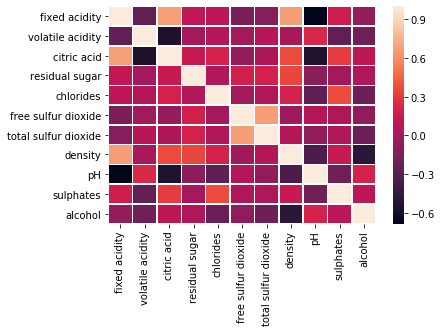

In [4]:
corr_table = dataset.ix[:, 0:11].corr()
sns.heatmap(corr_table, linewidths=.5)# pre-check the correlation between the features
plt.show()

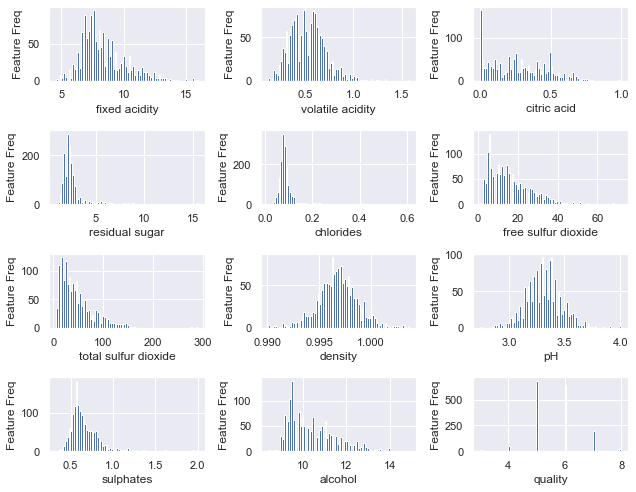

In [5]:
col_name = dataset.columns.tolist()
sns.set()
plt.figure(figsize=(9, 7))
for i in range(12):
    plt.subplot(4, 3, i+1)
    dataset[col_name[i]].hist(bins=80)
    plt.xlabel(col_name[i])
    plt.ylabel("Feature Freq")
plt.tight_layout()# plot the distribution of features

In [6]:
x_train,x_test,y_train,y_test = train_test_split(dataset.ix[:,0:11],dataset['quality'],random_state=42)
# first we try to split data as two parts: train set and test set

In [7]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)
print('Train score:{:.3f}'.format(tree.score(x_train,y_train)))
print('Test score:{:.3f}'.format(tree.score(x_test,y_test)))
# We try to make a classification by using Decision Tree model

Train score:1.000
Test score:0.570


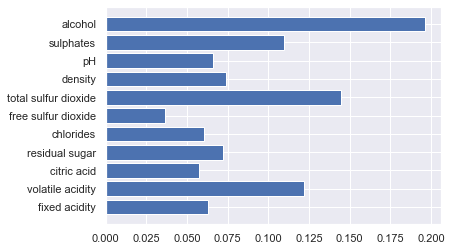

In [8]:
plt.barh(col_name[0:11], tree.feature_importances_)
plt.show()
# We plot different features' feature importance by DecisionTree

In [9]:
avg = np.mean(tree.feature_importances_)
feature_column = []
for i in range(len(col_name[0:11])):
    if tree.feature_importances_[i] > avg:
        feature_column.append(col_name[i])
new_dataset = dataset[feature_column]
print(feature_column)
new_dataset = dataset[feature_column + ['quality']]
# we try to find the features which feature importance is above average.

['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']


In [10]:
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(new_dataset[feature_column], new_dataset['quality'], random_state=4)

In [11]:
svm1 = SVC()
svm1.fit(x_train_new, y_train_new)# After pre select features with decision tree, we use Support Vector Machine model
score_train_new = accuracy_score(svm1.predict(x_train_new), y_train_new)
score_test_new = accuracy_score(svm1.predict(x_test_new), y_test_new)
score_new = [score_train_new, score_test_new]
print('Train score after selection:{:.3f}'.format(score_train_new))
print('Test score after selection:{:.3f}'.format(score_test_new))

Train score after selection:0.626
Test score after selection:0.580


In [12]:
svm2 = SVC()
svm2.fit(x_train, y_train)
score_train_old = accuracy_score(svm2.predict(x_train), y_train)
score_test_old = accuracy_score(svm2.predict(x_test), y_test)
score_old = [score_train_old, score_test_old]
print('Train score before selection:{:.3f}'.format(score_train_old))
print('Test score before selection:{:.3f}'.format(score_test_old))
# We compare the result after feature selection with before feature selection

Train score before selection:0.756
Test score before selection:0.540


In [13]:
rf = RandomForestClassifier(n_estimators=300)# we try random forest model
rf.fit(x_train_new, y_train_new)
print('Train score:{:.3f}'.format(rf.score(x_train_new,y_train_new)))
print('Test score:{:.3f}'.format(rf.score(x_test_new,y_test_new)))

Train score:1.000
Test score:0.698


In [14]:
# we try to adjust the hyperparameter
train_score = []
test_score = []
for n in range(40, 600, 40):
    rf = RandomForestClassifier(n_estimators=n,random_state=4)
    rf.fit(x_train_new,y_train_new)
    train_score.append(rf.score(x_train_new,y_train_new))
    test_score.append(rf.score(x_test_new,y_test_new))
    print("While the n_estimator=%d, the train_score=%.3f, the test_score=%.3f" %(n,rf.score(x_train_new,y_train_new),rf.score(x_test_new,y_test_new)))

While the n_estimator=40, the train_score=0.998, the test_score=0.713
While the n_estimator=80, the train_score=1.000, the test_score=0.718
While the n_estimator=120, the train_score=1.000, the test_score=0.705
While the n_estimator=160, the train_score=1.000, the test_score=0.703
While the n_estimator=200, the train_score=1.000, the test_score=0.705
While the n_estimator=240, the train_score=1.000, the test_score=0.708
While the n_estimator=280, the train_score=1.000, the test_score=0.710
While the n_estimator=320, the train_score=1.000, the test_score=0.710
While the n_estimator=360, the train_score=1.000, the test_score=0.713
While the n_estimator=400, the train_score=1.000, the test_score=0.715
While the n_estimator=440, the train_score=1.000, the test_score=0.710
While the n_estimator=480, the train_score=1.000, the test_score=0.710
While the n_estimator=520, the train_score=1.000, the test_score=0.710
While the n_estimator=560, the train_score=1.000, the test_score=0.703
